**UTILITY FUNCTIONS AND LIBRARIES***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

***DATASET LOADING***

In [3]:
df = pd.read_csv("layoffs_data.csv")

***DATASET PRELIMINARY ANALYSIS***

In [4]:
df

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Lyst,London,Retail,50.0,0.25,2022-11-29,https://techcrunch.com/2022/11/29/lyst-the-uk-...,144.0,Unknown,2022-11-30 06:03:36,United Kingdom,Unknown
1,Bitfront,SF Bay Area,Crypto,NaN,1.00,2022-11-29,https://www.reuters.com/technology/crypto-exch...,NaN,Unknown,2022-11-30 05:54:28,United States,Unknown
2,Codexis,SF Bay Area,Healthcare,NaN,0.18,2022-11-29,https://www.codexis.com/investors/news-events/...,162.0,IPO,2022-11-30 06:17:39,United States,Unknown
3,Lazerpay,Lagos,Crypto,NaN,NaN,2022-11-29,https://techpoint.africa/2022/11/29/lazerpay-s...,NaN,Unknown,2022-11-30 05:59:51,Nigeria,Unknown
4,MessageBird,Amsterdam,Other,NaN,0.31,2022-11-29,https://tech.eu/2022/11/29/messagebird-lay-off...,1100.0,Series C,2022-11-30 05:57:28,Netherlands,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1691,Service,Los Angeles,Travel,NaN,1.00,2020-03-16,https://techcrunch.com/2020/03/16/travel-savin...,5.1,Seed,2020-08-31 15:17:26,United States,Unknown
1692,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,Unknown
1693,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,Unknown
1694,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,Unknown


In [5]:
df.shape

(1696, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     1696 non-null   object 
 1   Location                    1696 non-null   object 
 2   Industry                    1696 non-null   object 
 3   Laid_Off_Count              1197 non-null   float64
 4   Percentage                  1137 non-null   float64
 5   Date                        1696 non-null   object 
 6   Source                      1696 non-null   object 
 7   Funds_Raised                1575 non-null   float64
 8   Stage                       1696 non-null   object 
 9   Date_Added                  1696 non-null   object 
 10  Country                     1696 non-null   object 
 11  List_of_Employees_Laid_Off  1696 non-null   object 
dtypes: float64(3), object(9)
memory usage: 159.1+ KB


Therefore we have null/unknown values in 'Laid_Off_count', 'Percentage', 'Funds_Raised', 'List_of_Employees_Laid_Off'

'List_of_Employees_Laid_Off' can be removed as it isnt signficant due to all major values being 'Unknown' and other files being links to spreadsheets. The race, position and other characteristics should have been taken into account but wasnt possible here.

'Source' can be dropped as well due to links.

In [7]:
df['List_of_Employees_Laid_Off'].value_counts()

Unknown                                                                                                    1567
https://hopin.softr.app/                                                                                      2
https://docs.google.com/spreadsheets/d/1fsGXTNfMWJcpbEHFz0hXifyNCMKnxo9VOoofDf7MCXI/edit                      2
https://docs.google.com/spreadsheets/d/1pIzBYSHU-wHamYgjR55TaYQF8vkAV0xFUcM2JbswaOU/edit                      1
https://docs.google.com/spreadsheets/d/1JsVo5Zz_TqCGhYdPpJ59Inq9fkDnPqLftTLWKvcbDww/edit#gid=2146490888       1
                                                                                                           ... 
https://docs.google.com/spreadsheets/d/1HEKOS0LEjpFYEbY4coaJJM-vNE42ZBLipkgZechoSf0/edit                      1
https://docs.google.com/spreadsheets/d/1nAlPKtYWnHFyO6piehgqZyqBGXJPBJZ22nQ-mbPM_5E/edit?usp=sharing          1
https://docs.google.com/spreadsheets/d/1_v1SdSE16SLkY4qFm0JOP2-ff-jOYt0-blxPrdAqEPo/edit                

In [8]:
#df_analysis = ProfileReport(df)
#df_analysis

In [372]:
def drop_cols(df,cols):
    for i in cols:
        del df[i]
    return df

In [373]:
df = drop_cols(df, ['Source','List_of_Employees_Laid_Off', 'Date_Added'])

In [374]:
df.isna().any()

Company           False
Location          False
Industry          False
Laid_Off_Count     True
Percentage         True
Date              False
Funds_Raised       True
Stage             False
Country           False
dtype: bool

In [375]:
df.isin(['Unknown']).any()

Company           False
Location          False
Industry           True
Laid_Off_Count    False
Percentage        False
Date              False
Funds_Raised      False
Stage              True
Country           False
dtype: bool

'Laid_Off_Count', 'Percentage', 'Funds_Raised' have missing values

'Industry', 'Stage',  have Unknown Values

9 features

Categorical : 'Company' , 'Location' , 'Industry', 'Date', 'Stage', 'Country'

Numeric : 'Laid_Off_Count', 'Percentage', 'Funds_Raised' 

In [376]:
cat_ex = ['Company', 'Location', 'Country']
round_ex = ['Laid_Off_Count', 'Funds_Raised', 'Industry', 'Stage']
cat_fill_ex = ['Industry', 'Stage']
num_fill_ex = [ 'Percentage','Laid_Off_Count','Funds_Raised']
num_cols = ['Laid_Off_Count', 'Percentage', 'Funds_Raised']

In [377]:
def cat2num(df,cols):
    oe = OrdinalEncoder()
    for i in cols:
        df[i] = oe.fit_transform(df[[i]])
        df[i] = df[i].astype('int')
    return df

In [378]:
# def impute(df,cols):
#     my_imputer = SimpleImputer()
#     for i in cols:
#         df[i] = my_imputer.fit_transform(df[[i]])
#     return df

In [379]:
def round2(df,cols):
    for i in cols:
        df[i] = df[i].astype(int)
    return df

In [380]:
def date2convert(df,col):
    df[col] = pd.to_datetime(df[col])
    df['Date_month'] = df[col].dt.month
    df['Date_day'] = df[col].dt.day
    del df[col]
    return df

In [381]:
def cat2fill(df,cols):
    df[cols] = df[cols].apply(lambda series: pd.Series(LabelEncoder().fit_transform(series[series.notnull()].index)))
    imp_cat = IterativeImputer(estimator=RandomForestClassifier(), initial_strategy='most_frequent')
    df[cols] = imp_cat.fit_transform(df[cols])
    return df

In [382]:
def num2fill(df,cols):
    imp_num = IterativeImputer(estimator=RandomForestRegressor(),
                               initial_strategy='mean',
                               max_iter=10, random_state=0)
    df[cols] = imp_num.fit_transform(df[cols])
    return df

In [383]:
df = pd.read_csv("layoffs_data.csv")
df = drop_cols(df, ['Source','List_of_Employees_Laid_Off', 'Date_Added'])
df = df.replace('Unknown', np.nan)
df = num2fill(df,num_fill_ex)
df = cat2num(df,cat_ex)
df = date2convert(df, 'Date')
df = cat2fill(df,cat_fill_ex)
df = round2(df, round_ex)
df

C:\Users\Thoriday\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
C:\Users\Thoriday\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


,Company,Location,Industry,Laid_Off_Count,Percentage,Funds_Raised,Stage,Country,Date_month,Date_day
0,723,81,0,50,0.2500,144,0,51,11,29
1,133,124,1,879,1.0000,522,1,52,11,29
2,275,124,2,120,0.1800,162,2,52,11,29
3,675,73,3,1215,0.2306,4683,3,33,11,29
4,758,1,4,557,0.3100,1100,4,31,11,29
...,...,...,...,...,...,...,...,...,...,...
1691,1051,82,1691,86,1.0000,5,1403,52,3,16
1692,552,82,1692,8,0.1000,45,1403,52,3,13
1693,876,124,1594,6,0.7500,1,1403,52,3,13
1694,1177,82,1594,20,0.4000,90,1403,52,3,12


In [384]:
df.isnull().sum()

Company           0
Location          0
Industry          0
Laid_Off_Count    0
Percentage        0
Funds_Raised      0
Stage             0
Country           0
Date_month        0
Date_day          0
dtype: int64

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1696 non-null   int32  
 1   Location        1696 non-null   int32  
 2   Industry        1696 non-null   int32  
 3   Laid_Off_Count  1696 non-null   int32  
 4   Percentage      1696 non-null   float64
 5   Funds_Raised    1696 non-null   int32  
 6   Stage           1696 non-null   int32  
 7   Country         1696 non-null   int32  
 8   Date_month      1696 non-null   int64  
 9   Date_day        1696 non-null   int64  
dtypes: float64(1), int32(7), int64(2)
memory usage: 86.2 KB


***APPLYING ML MODELS & HYPERPARAMETER TUNING***

In [431]:
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df = pd.DataFrame(df)
y = df['Industry'].values
X = df.drop('Industry',axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [432]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=8)             
rfe = rfe.fit(X_train, y_train)
list(zip(df.columns,rfe.support_,rfe.ranking_))


[('Company', False, 2),
 ('Location', True, 1),
 ('Industry', True, 1),
 ('Laid_Off_Count', True, 1),
 ('Percentage', True, 1),
 ('Funds_Raised', True, 1),
 ('Stage', True, 1),
 ('Country', True, 1),
 ('Date_month', True, 1)]

In [433]:
y_pred = rfe.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.988069736387197


In [434]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores

array([0.98743104, 0.98414187, 0.98724344, 0.98406737, 0.98945174])

In [435]:
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-3723.54229606, -3600.28470154, -2917.92895533, -3213.23517877,
       -2896.49758796])

In [457]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, 10))}]
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)   
model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='r2', verbose=1)

In [454]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004001,0.000633,0.000400,0.000490,1,{'n_features_to_select': 1},0.775776,0.764826,0.797613,-0.003014,...,0.467286,0.382414,9,0.772773,0.775734,0.767076,0.000683,0.000080,0.463269,0.377956
1,0.003001,0.000633,0.000000,0.000000,2,{'n_features_to_select': 2},0.776238,0.762435,0.796806,0.778595,...,0.771735,0.017427,8,0.777615,0.775776,0.772256,0.772396,0.780283,0.775665,0.003081
2,0.003134,0.006269,0.000000,0.000000,3,{'n_features_to_select': 3},0.775991,0.769182,0.796607,0.782555,...,0.774987,0.015193,7,0.777880,0.778496,0.772502,0.776202,0.783642,0.777744,0.003612
3,0.000000,0.000000,0.000000,0.000000,4,{'n_features_to_select': 4},0.776009,0.769297,0.795887,0.781776,...,0.822444,0.083861,6,0.777883,0.778506,0.772539,0.776327,0.985859,0.818223,0.083844
4,0.000000,0.000000,0.003125,0.006250,5,{'n_features_to_select': 5},0.987756,0.984258,0.986944,0.983713,...,0.986384,0.002101,5,0.986183,0.987102,0.986359,0.987193,0.985859,0.986539,0.000523
5,0.003125,0.006250,0.000000,0.000000,6,{'n_features_to_select': 6},0.987684,0.984437,0.987074,0.983921,...,0.986496,0.002041,3,0.986345,0.987204,0.986470,0.987287,0.985981,0.986657,0.000507
6,0.000000,0.000000,0.003125,0.006251,7,{'n_features_to_select': 7},0.987452,0.984346,0.987281,0.984105,...,0.986540,0.002048,1,0.986488,0.987321,0.986514,0.987335,0.986042,0.986740,0.000508
7,0.000000,0.000000,0.000000,0.000000,8,{'n_features_to_select': 8},0.987440,0.984277,0.987285,0.984081,...,0.986512,0.002056,2,0.986488,0.987341,0.986514,0.987345,0.986055,0.986748,0.000512
8,0.003125,0.006250,0.000000,0.000000,9,{'n_features_to_select': 9},0.987431,0.984142,0.987243,0.984067,...,0.986467,0.002079,4,0.986488,0.987359,0.986519,0.987346,0.986058,0.986754,0.000515


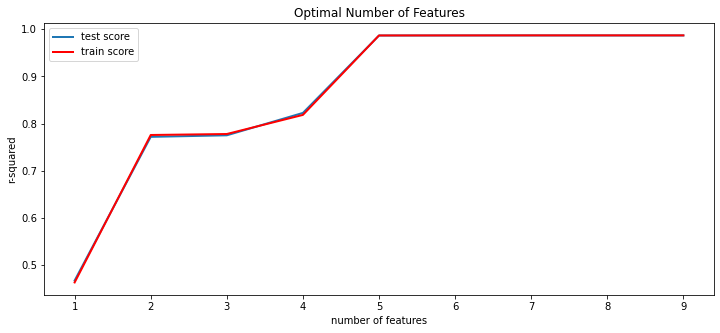

In [461]:
plt.figure(figsize=(12,5))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"], linewidth=2)
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"], color='red', linewidth=2)
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')